# Visualisation des données

In [25]:
import os
import pandas as pd

In [26]:
# Répertoire du fichier de données
PROCESSED_DIR = '../corona/data/processed/'

# Table principale 
ALL_DATA_FILE = 'all_data.csv'

In [27]:
epidemie_df = (pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=['Last Update'])
               .assign(day=lambda _df: _df['Last Update'].dt.date))

In [4]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,31.8257,117.2264,01-22-2020.csv,2020-01-22
1,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN,40.1824,116.4142,01-22-2020.csv,2020-01-22
2,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN,30.0572,107.8740,01-22-2020.csv,2020-01-22
3,Fujian,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,26.0789,117.9874,01-22-2020.csv,2020-01-22
4,Gansu,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,36.0611,103.8343,01-22-2020.csv,2020-01-22


In [5]:
epidemie_df['Country/Region'].value_counts()

Mainland China    1358
US                 535
Australia          177
Canada             116
Taiwan              44
                  ... 
Ivory Coast          1
South Africa         1
Slovenia             1
Palestine            1
North Ireland        1
Name: Country/Region, Length: 94, dtype: int64

## Epidemie en France

In [28]:
import seaborn as sns

sns.set()

In [29]:
%matplotlib inline

In [8]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
124,NaN,France,2020-01-24 17:00:00,2.0,NaN,NaN,47.0,2.0,01-24-2020.csv,2020-01-24
165,NaN,France,2020-01-25 17:00:00,3.0,NaN,NaN,47.0,2.0,01-25-2020.csv,2020-01-25
211,NaN,France,2020-01-26 16:00:00,3.0,NaN,NaN,47.0,2.0,01-26-2020.csv,2020-01-26
258,NaN,France,2020-01-27 23:59:00,3.0,NaN,NaN,47.0,2.0,01-27-2020.csv,2020-01-27
309,NaN,France,2020-01-28 23:00:00,4.0,NaN,NaN,47.0,2.0,01-28-2020.csv,2020-01-28


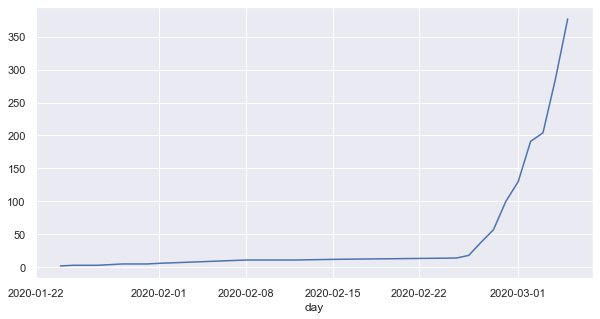

In [9]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')['Confirmed'].plot(figsize=(10, 5));

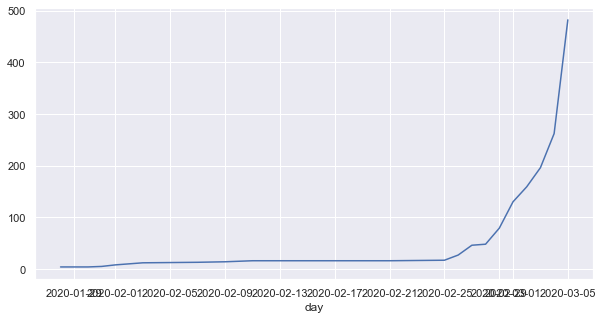

In [10]:
epidemie_df[epidemie_df['Country/Region'] == 'Germany'].set_index('day')['Confirmed'].plot(figsize=(10, 5)); 

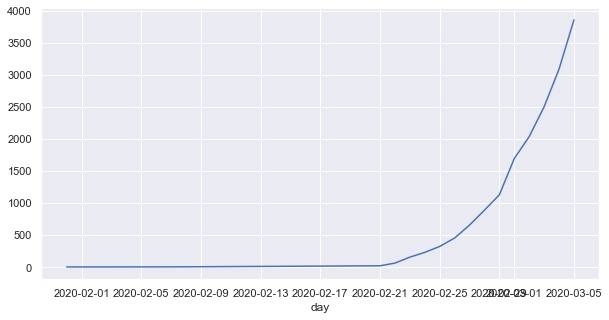

In [11]:
epidemie_df[epidemie_df['Country/Region'] == 'Italy'].set_index('day')['Confirmed'].plot(figsize=(10, 5)); 

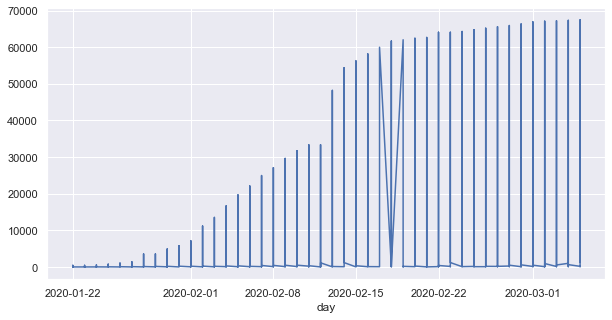

In [12]:
epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'].set_index('day')['Confirmed'].plot(figsize=(10, 5)); 
#Chaque jour il y a plusieurs points, c'est pour ça que le graphique est bizarre

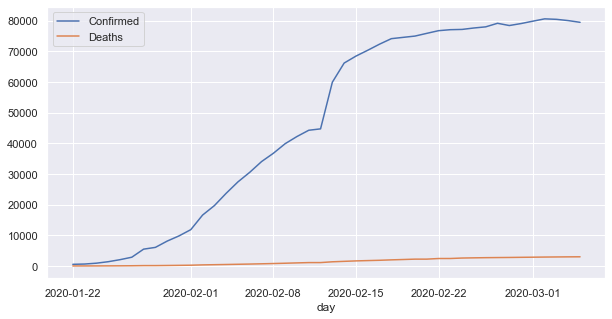

In [13]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .fillna(value=0)
 .groupby('day')
 .agg({'Confirmed' : 'sum', "Deaths" : 'sum'})
).plot(figsize=(10, 5));

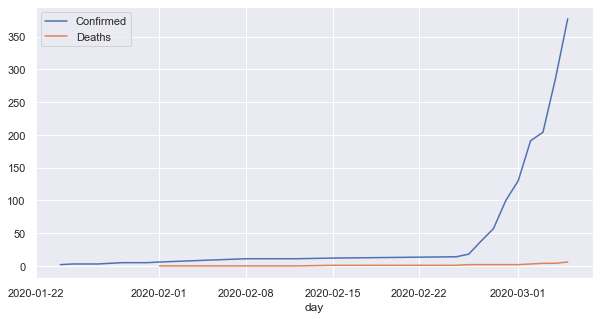

In [14]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')[['Confirmed', 'Deaths']].plot(figsize=(10, 5));

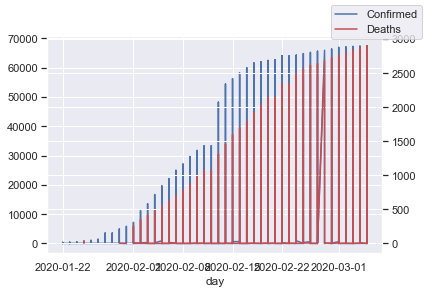

In [15]:
import matplotlib.pyplot as plt

ax = epidemie_df.plot(x="day", y='Confirmed', legend=False)
ax2 = ax.twinx()
epidemie_df.set_index('day').plot(y="Deaths", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

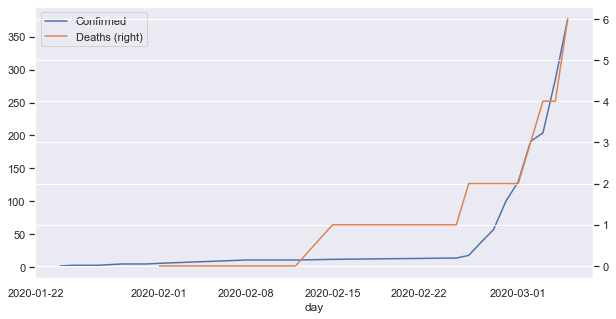

In [16]:
    (epidemie_df[epidemie_df['Country/Region'] == 'France']
     .set_index('day')[ ['Confirmed', 'Deaths'] ]
     .plot(secondary_y=['Deaths'], figsize=(10, 5))
    );

In [17]:
china_df = (epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
            .groupby('day')
            .agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
           )
china_df.head()

,Confirmed,Deaths,Recovered
day,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0


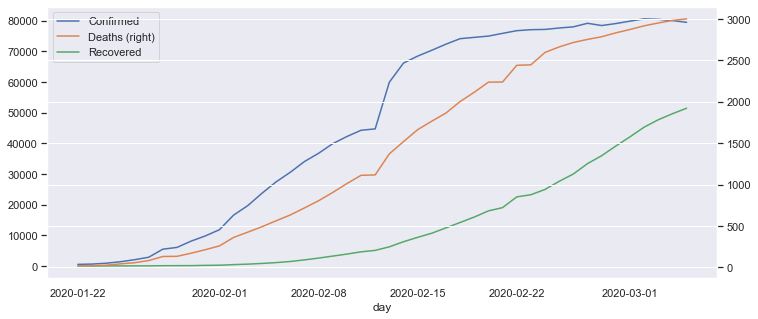

In [18]:
china_df.plot(secondary_y=['Deaths'], figsize=(12, 5))

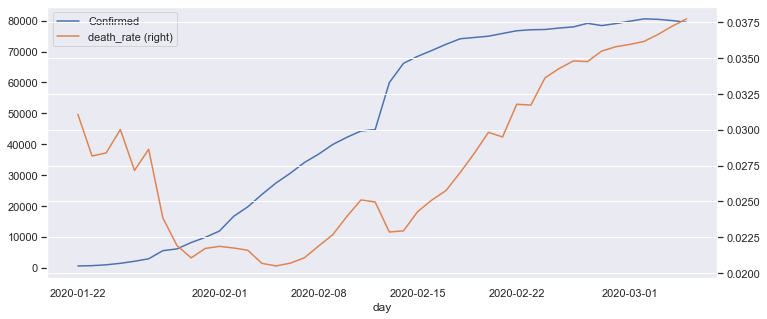

In [19]:
(china_df
 .assign(death_rate=lambda _df: _df['Deaths'] / _df['Confirmed'])
 [['Confirmed', 'death_rate']]
 .plot(secondary_y=['death_rate'], figsize=(12, 5))
);

In [20]:
EUROPE = ['France', 'Germany', 'Italy', 'Spain']

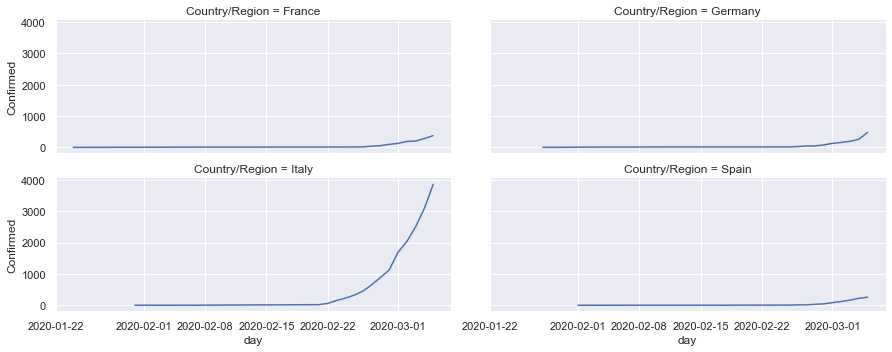

In [21]:
g = sns.FacetGrid(epidemie_df[epidemie_df['Country/Region'].isin(EUROPE)],
                 col='Country/Region', col_wrap=2, height=2.5, aspect=2.5)   
g = g.map(plt.plot, "day", "Confirmed")

#col_wrap : il fait 2 colonnes et quand il arrive au bout de la colonne il va à la ligne

In [30]:
import plotly.offline as py
import plotly.graph_objs as go

In [31]:
france_df = epidemie_df[epidemie_df['Country/Region'] == 'France']

In [32]:
data = [go.Scatter(x=france_df['day'], y=france_df['Confirmed'])]
py.iplot(data)

In [35]:
    data = [go.Scatter(x=france_df['day'],
                       y=france_df['Confirmed'],
                       name='Confirmés/France'
                      ),
            go.Scatter(x=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['day'],
                       y=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['Confirmed'],
                       name='Confirmés/Allemagne'
                      )
           ]
    
    layout = dict(
        title = "Epidémie Corona Virus",
        xaxis = dict(range = ['2020-01-22', '2020-03-05'])
    )
    
    fig = dict(data=data, layout=layout)
    py.iplot(fig)

Devoir de recherches 

??

Trouver une info sur le nb de voyageur dans un pays via les aéroports 

Modélisaation de porpagation des épidémies sur les séries temp (package R existent déjà)